# CEDA DataPoint - Demonstration

The CEDA DataPoint module wraps both the ``pystac_client`` and ``xarray`` packages into a single container for searching and accessing data. This notebook shows how methods function in DataPoint.

In [1]:
from datapoint import DataPointClient

client = DataPointClient(org='CEDA') # All public connection kwargs are known by default for CEDA

with the DataPointClient a user can find the collections offered by the organisation/STAC API and view the search terms for each collection (or just for one collection)

In [2]:
client.list_collections()

cci: cci
cmip6: CMIP6
cordex: CORDEX
eocis-sst-cdrv3: EOCIS Sea-Surface Temperatures V3
land_cover: land_cover
sentinel1: Sentinel 1
sentinel2_ard: sentinel 2 ARD
ukcp: UKCP


In [3]:

client.list_search_terms(collection='cci')

cci:
 - datetime, start_datetime, end_datetime, units, project_id, institution_id, platform_id, activity_id, source_id, table_id, project, product_version, frequency, variables, doi, uuid, created, updated


## Search for STAC items using the client
Using the search terms above as part of a 'query', users can obtain a DataPointSearch instance which enables access to a set of items from the collection.

In [4]:
item_search = client.search(
    collections=['cci'],
    max_items=10,
    query=[
        'platform_id=Sentinel-3B'
    ]
)

It may be useful to show what search terms were applied, as listed below

In [5]:
item_search.info()

Search terms:
 - collections: ['cci']
 - max_items: 10
 - query: ['platform_id=Sentinel-3B']


Attributed to each item, there may be one or more cloud assets which can be opened as datasets by datapoint. These can be listed for your search results using the below syntax:

In [6]:
item_search.cloud_assets()

<Item: ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1MONTHLY_NIGHT-201812-202012-fv3.00>: 
 - reference_file
<Item: ESACCI-LST-L3C-LST-SLSTRB-0.01deg_1MONTHLY_DAY-201812-202012-fv3.00>: 
 - reference_file


The syntax `reference_file` is the current way of tracking reference-type files in our STAC index. This could potentially be changed in a production version to be more useful for users (i.e kerchunk_file, cfa_file, zarr_store etc.)

Any item may be selected from the item_search by simply indexing as if it were a list (or a dictionary using the appropriate Item ID as it appears above).

In [7]:
item = item_search[0]
item.variables

['land_surface_temperature']

Certain item properties that are common across all/most collections have been turned into class properties for the item objects. These will display `None` if the item does not contain that property. All other item properties can be obtained either as a complete dictionary, or selected individually using the below methods:

In [8]:
item.get_attributes()

{'datetime': '2019-12-01T12:00:00Z',
 'start_datetime': '2018-12-01T00:00:00Z',
 'end_datetime': '2020-12-01T00:00:00Z',
 'units': None,
 'project_id': 'Climate Change Initiative - European Space Agency',
 'institution_id': 'University of Leicester',
 'platform_id': 'Sentinel-3B',
 'activity_id': None,
 'source_id': None,
 'table_id': None,
 'project': 'Climate Change Initiative - European Space Agency',
 'product_version': '3.00',
 'frequency': None,
 'variables': 'land_surface_temperature',
 'doi': '10.5285/b54d5f1c08594879a05929ce09951c56',
 'uuid': None,
 'created': '2024-09-24T10:38:07.968002Z',
 'updated': '2024-09-24T10:38:07.968002Z'}

## Opening datasets
The key aspect of using DataPoint to search for data is that the cloud assets from each item can be opened seamlessly into an Xarray dataset, without the user needing to know any configuration details for the specific dataset. An example (with additional kwargs) is shown below.

In [9]:
ds = item.open_dataset(combine=False, mode='xarray', priority=None) # Default kwargs

In [10]:
ds

<xarray.Dataset> Size: 2TB
Dimensions:          (channel: 2, time: 25, lat: 18000, lon: 36000,
                      length_scale: 1)
Coordinates:
  * channel          (channel) float64 16B 11.0 12.0
  * lat              (lat) float32 72kB -90.0 -89.99 -89.98 ... 89.98 89.99
  * lon              (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time             (time) datetime64[ns] 200B 2018-12-01 ... 2020-12-01
Dimensions without coordinates: length_scale
Data variables: (12/14)
    dtime            (time, lat, lon) timedelta64[ns] 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lcc              (time, lat, lon) float32 65GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst              (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_loc_atm  (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_loc_sfc  (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    lst_unc_ran      (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    ...               ...
    n                (time, lat, lon) float32 65GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    sataz            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    satze            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    solaz            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    solze            (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    variance         (time, lat, lon) float64 130GB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.8
    cdm_data_type:              grid
    comment:                    These data were produced as part of the ESA L...
    creator_email:              djg20@le.ac.uk
    creator_name:               University of Leicester Surface Temperature G...
    creator_url:                https://climate.esa.int/en/projects/land-surf...
    ...                         ...
    time_coverage_end:          20201231T235959
    time_coverage_resolution:   P1M
    time_coverage_start:        20181201T000000
    title:                      ESA LST CCI land surface temperature data at ...
    kerchunk_revision:          1
    kerchunk_creation_date:     270224T211320

In [11]:
ds['lst'].long_name

'land surface temperature'

From this point, the dataset is a standard Xarray dataset with no extra features, so anyone comfortable using Xarray will be fine from here. There may be an option in the future to add cf-python support (using the `mode` kwarg) but this has not been implemented yet (mostly because the reference kerchunk files cannot be interpreted by cf-python.)

In [12]:
%%time
result = ds['lst'].isel(time=slice(0,5)).mean(dim='time')

CPU times: user 15.3 ms, sys: 724 μs, total: 16 ms
Wall time: 16.1 ms


CPU times: user 810 ms, sys: 135 ms, total: 945 ms
Wall time: 4.31 s


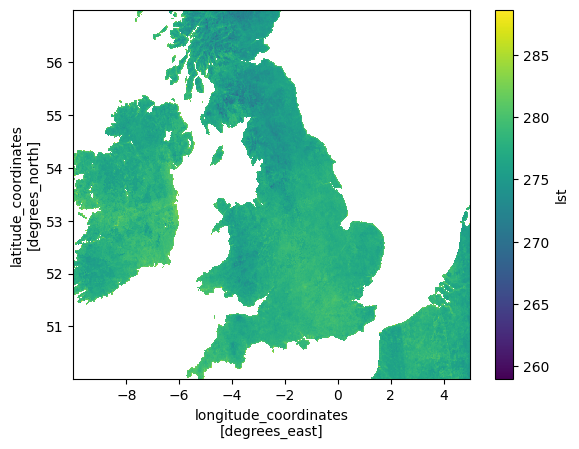

In [13]:
%%time
result.sel(lat=slice(50,57), lon=slice(-10,5)).plot()

## Opening a CFA dataset
At the moment the kerchunk datasets take priority when opening the dataset, but this can be overridden as shown below.

In [14]:
item_cfa = client.search(
    collections=['cmip6'],
    query=[
        'experiment_id=ssp119',
        'institution_id=CNRM-CERFACS',
        'activity_id=ScenarioMIP',
        'mip_era=CMIP6',
        'cf_standard_name=specific_humidity'
    ]
)

The `item_search` object contains a single item from the CMIP6 collection which has a CFA asset (listed as `reference_file_2`)

In [15]:
item_cfa.cloud_assets()

<Item: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.3hr.huss.gr.v20190328>: 
 - reference_file_2, reference_file
<Item: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.day.huss.gr.v20190328>: 
 - reference_file
<Item: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.Amon.huss.gr.v20190328>: 
 - reference_file


We can then open the CFA-netCDF file specifically by setting this in the priority list as the first option. (Without the priority option this would currently default to kerchunk - further standards considerations are needed.)

In [16]:
ds = item_cfa.open_dataset(priority=['reference_file_2','reference_file'], decode_times=True)
ds

<DataPointCluster: (3)>
<DataPointProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.3hr.huss.gr.v20190328>
<DataPointProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.day.huss.gr.v20190328>
<DataPointProduct: CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp119.r1i1p1f2.Amon.huss.gr.v20190328>

Because there are multiple datasets in this search, we receive a DataPointCluster of datasets, which is effectively a fancy list. We can easily view one of the datasets by indexing the cluster. Other methods could be added to the cluster in the future, but for now it acts as a simple container for multiple datasets. (Not currently lazy loaded on creating the cluster - but this is a simple addition!)

In [17]:
ds[0]

<xarray.Dataset> Size: 33GB
Dimensions:      (time: 251288, axis_nbounds: 2, lat: 128, lon: 256)
Coordinates:
  * time         (time) datetime64[ns] 2MB 2015-01-01T03:00:00 ... 2101-01-01
  * lat          (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon          (lon) float64 2kB 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] 4MB ...
    height       float64 8B ...
    huss         (time, lat, lon) float32 33GB ...
Attributes: (12/52)
    Conventions:            CF-1.11 CFA-0.6.2
    xios_commit:            1442-shuffle
    parent_activity_id:     CMIP
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    forcing_index:          2
    ...                     ...
    physics_index:          1
    grid:                   data regridded to a T127 gaussian grid (128x256 l...
    EXPID:                  CNRM-ESM2-1_ssp119_r1i1p1f2
    description:            Future scenario with low radiative forcing throug...
    history:                none
    external_variables:     areacella